## April showers bring 311 complaints?
In this notebook, I'll be running through a simple analysis to answer the question:

_Are there more 311 complaints on rainy days versus clear days?_

 - [Retrieve data](#ret)
 - [Obtain data from Wunderground](#obt)
 - [Joining](#joi)
 - [Test](#tes)

### <a name='ret'></a>Retrieve data from Boston Open Data Portal
In order to do this, we will need to import the requests module, which will allow us to sent API requests to the Socrata API (which holds Boston's Open Data).  The `import` function allows us to do that.  It makes sense, in a notebook, to separate the import function from the rest of the code, otherwise we will be re-running import every time we run the cell

In [1]:
import requests

A quick google search gets us to the Boston Open Data Portal, which has an API endpoint for 311 requests at https://data.cityofboston.gov/resource/wc8w-nujj.json . Let's get 100k rows using the limit syntax in the SODA API

In [2]:
# Query from open data
url = 'https://data.cityofboston.gov/resource/wc8w-nujj.json?$limit=100000'
response = requests.get(url)

Now that we've stored the result of the request in the `response` variable, we can use the .read() method to retrieve the data and insert it into a pandas dataframe.  A dataframe is simply a structure that's easier to manipulate and perform typical data analyses on.

First we'll have to `import` pandas.  Here I specify the alias pd, just because I don't want to keep writing out pandas.  Then, we can use panda's handy `.read_json()` method to read the response (which is in JSON format)

In [3]:
import pandas as pd

In [4]:
df = pd.read_json(response.content)

### <a name='dat'></a>Data exploration

Let's take a look that the dataframe looks how we expect.  `.head()` and `.tail()` are helpful methods for getting a quick peek at the data.  The `.columns` attribute allows us to look at list of columns.  The `.describe()` method gives us some easy stats for numerical columns and the `.info()` method allows us to look at the data types and missing values

In [5]:
df.head()

,case_enquiry_id,case_status,case_title,city_council_district,closed_dt,closedphoto,closure_reason,department,fire_district,geocoded_location,...,property_type,pwd_district,queue,reason,source,subject,submittedphoto,target_dt,type,ward
0,101000326378,Closed,Schedule a Bulk Item Pickup,9.0,2011-09-08T09:33:21.000,NaN,Case Closed Case Scheduled Items have been sch...,PWDx,11.0,"{u'type': u'Point', u'coordinates': [-71.1517,...",...,Address,04,PWDx_Schedule a Bulk Item Pickup,Sanitation,Self Service,Public Works Department,NaN,2011-09-12T09:29:08.000,Schedule a Bulk Item Pickup,Ward 22
1,101001322573,Closed,Request for Snow Plowing,1.0,2015-04-03T12:54:45.000,NaN,Case Closed Case Noted,PWDx,3.0,"{u'type': u'Point', u'coordinates': [-71.0565,...",...,Address,1B,PWDx_District 1B: North End,Street Cleaning,Constituent Call,Public Works Department,NaN,2015-03-05T11:25:08.000,Request for Snow Plowing,Ward 3
2,101000902663,Closed,Street Light Outages,1.0,2013-08-22T09:28:24.000,NaN,Case Closed Duplicate of Existing Case Gave to...,PWDx,3.0,"{u'type': u'Point', u'coordinates': [-71.0565,...",...,Intersection,1C,PWDx_Street Light Outages,Street Lights,Maximo Integration,Public Works Department,NaN,2013-08-29T12:59:01.000,Street Light Outages,Ward 3
3,101001903510,Closed,Improper Storage of Trash (Barrels),2.0,2016-09-08T17:55:10.000,NaN,Case Closed. Closed date : 2016-09-08 17:55:10...,PWDx,6.0,"{u'type': u'Point', u'coordinates': [-71.053, ...",...,Address,05,PWDx_Code Enforcement,Code Enforcement,Citizens Connect App,Public Works Department,https://mayors24.cityofboston.gov/media/boston...,2016-09-12T15:51:43.000,Improper Storage of Trash (Barrels),Ward 6
4,101001038153,Closed,Pothole Repair (Internal),7.0,2014-02-28T10:39:39.000,NaN,Case Closed Internal Case Performed by Highway...,PWDx,9.0,"{u'type': u'Point', u'coordinates': [-71.0877,...",...,Address,10B,PWDx_District 10B: Roxbury,Highway Maintenance,Employee Generated,Public Works Department,NaN,NaN,Pothole Repair (Internal),12


In [6]:
df.describe()

,case_enquiry_id,city_council_district,fire_district,latitude,location_zipcode,longitude,neighborhood_services_district,property_id
count,1.000000e+05,95689.000000,95354.000000,100000.000000,76719.000000,100000.000000,95689.000000,95718.000000
mean,1.010012e+11,4.644745,7.152568,42.326229,2127.405780,-71.084240,8.917963,105053.528208
std,5.070114e+05,2.565429,3.264007,0.034901,18.057572,0.035997,4.191097,100520.837971
min,1.010003e+11,0.000000,1.000000,42.232100,2108.000000,-71.181800,0.000000,1.000000
25%,1.010008e+11,2.000000,4.000000,42.295400,2121.000000,-71.108900,6.000000,17076.250000
50%,1.010012e+11,5.000000,7.000000,42.333500,2126.000000,-71.074300,10.000000,84764.500000
75%,1.010017e+11,7.000000,9.000000,42.359000,2131.000000,-71.058700,13.000000,147539.750000
max,1.010020e+11,9.000000,12.000000,42.395200,2467.000000,-70.995900,15.000000,419843.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 33 columns):
case_enquiry_id                   100000 non-null int64
case_status                       100000 non-null object
case_title                        99951 non-null object
city_council_district             95689 non-null float64
closed_dt                         92799 non-null object
closedphoto                       7965 non-null object
closure_reason                    92803 non-null object
department                        100000 non-null object
fire_district                     95354 non-null float64
geocoded_location                 100000 non-null object
land_usage                        73089 non-null object
latitude                          100000 non-null float64
location                          95718 non-null object
location_street_name              95718 non-null object
location_zipcode                  76719 non-null float64
longitude                         100000 no

Nice! You'll notice a lot of the columns are object datatypes, which means we won't see stats on them using `.describe()`.  One of those is open_dt, which seems like it might be the time of the complaint.  We definitely want to be able to see the max and min time of the sample we've taken of the data, so let's look at that column.

In [8]:
df['open_dt'].head(n=2)

0    2011-09-08T09:29:08.000
1    2015-03-03T11:25:09.000
Name: open_dt, dtype: object

Yup! That's our datetime.  So let's ensure Pandas knows this is a datetime column.

In [9]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['open_dt'].describe()

count                  100000
unique                  99338
top       2015-09-10 10:00:00
freq                        4
first     2011-07-01 06:24:38
last      2016-12-22 09:43:12
Name: open_dt, dtype: object

Nice! Now we see that our first observation is July 1st, 2011 and our last observation is December 22nd, 2016.  Let's make it a bit cleaner and just use 2016.  SODA API has that functionality, but we can also just do it here.  Now that Pandas knows that open_dt is datetime, we can create a date index by setting open_dt to index.  Then, conveniently enough, we can just look at observations that happened on a certain time or date!

We reset the index afterwards just because we want to be able to specify it as a column rather than the index.

In [10]:
df = df.set_index('open_dt')
df = df['2016']
df.reset_index(inplace=True)


Since our goal here is to see how many unique complaints per day we're looking at, we might want to check that none of these complaints are duplicates

In [11]:
df.duplicated()

TypeError: type object argument after * must be an iterable, not itertools.imap

So this is interesting (and a learning opportunity!).  This is a weird error, but we can poll the large knowledge base online to understand what this is telling us.  [This StackOverflow answer](http://stackoverflow.com/questions/26244309/how-to-analyze-all-duplicate-entries-in-this-pandas-dataframe) helps us understand.  It seems like there might be some columns that have data structures in them that don't play well with panda's duplicates function.

Maybe what makes the most sense is to just see if the case_enquiry id is duplicated.  The `.duplicated()` method returns `True` for a row if it's a duplicate, `False` otherwise.  The `.value_counts()` method gives us the count of each value within a column (very useful!).  As we can see here, there are no duplicates, as all the rows have returned `False`.

In [12]:
df.case_enquiry_id.duplicated().value_counts()

False    23604
Name: case_enquiry_id, dtype: int64

Great.  Now that we're sure we're not dealing with duplicates, let's get our counts by day.  Panda's `.groupby(X)` method allows us to group observations by values within column X.  The open_dt column, however, is a timestamp.  So we need to make a new column that has the day.  We can do this by using `.apply()`, which applies a function over a certain axis (e.g. rows or columns).  

In [13]:
df['open_date'] = df.open_dt.apply(lambda x: x.date())
df['open_date'].head(n=2)

0    2016-09-08
1    2016-06-24
Name: open_date, dtype: object

Now, let's group by.

In [14]:
df_g = df.groupby('open_date')
print df_g

Groupby gives us a DataFrameGroupBy object, which has its own methods and attributes.  It's a bit complicated, but let's just forge ahead and get the count of the number of unique case_enquiry_ids for each date.  We do this by applying the unique function to the case_enquiry_id column in each date and getting the length of the result (i.e. the number of unique ids)

In [15]:
id_by_date = df_g.apply(lambda x: len(x['case_enquiry_id'].unique()))
print id_by_date.head()

open_date
2016-01-01    29
2016-01-02    23
2016-01-03    34
2016-01-04    64
2016-01-05    83
dtype: int64


Okay, cool, but what if we want to see how this looks over time? Pandas' got you covered.  It will generate a quick plot just by using the `.plot()` method.  To see it, you'll have to import the matplotlib library.  It's also convenient to specify that matplotlib shows its plot within the notebook.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

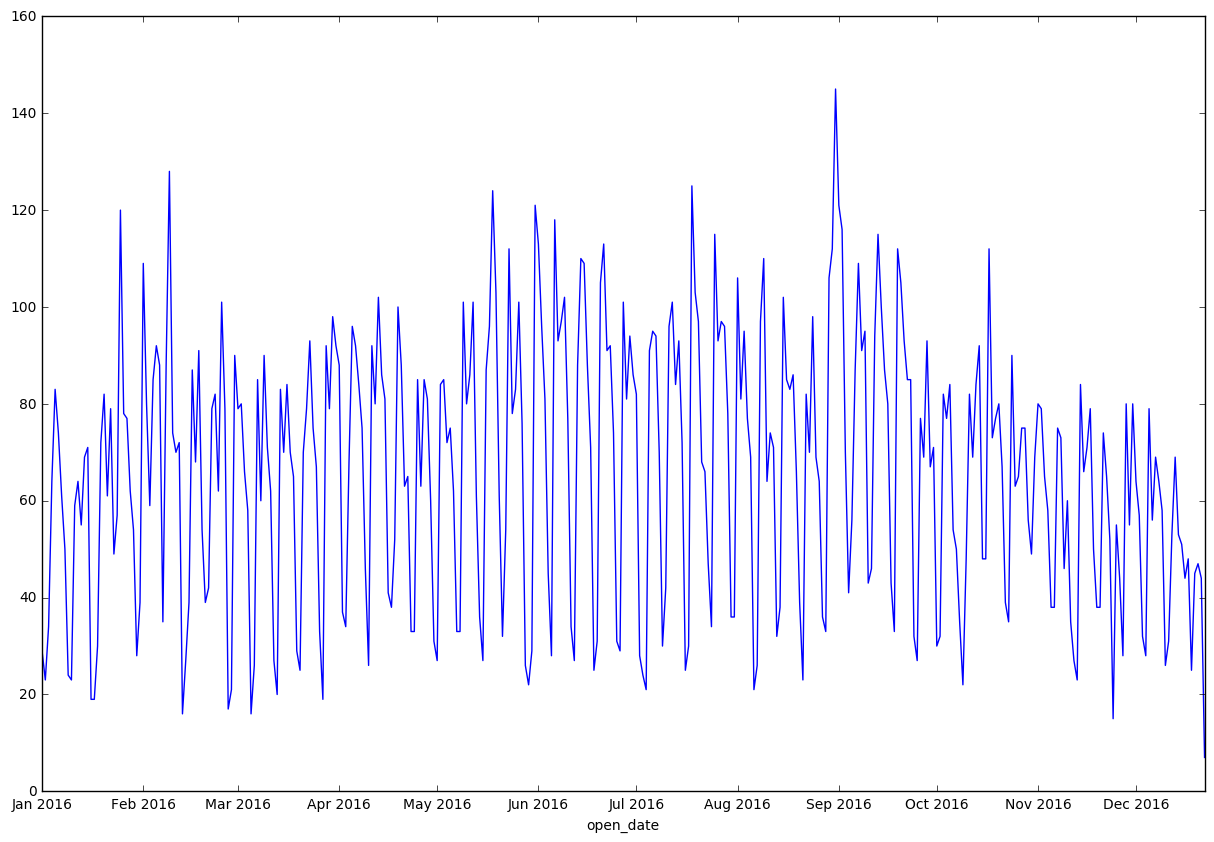

In [17]:
# Visualize
id_by_date.plot(figsize=(15,10))
plt.show()

Well look at that.  We can see Allston Christmas in there.

But generally, there's some temporal patterns to this, as we'd expect.  What remains to be seen, though, is how this patterns varies between rainy and clear days.  To answer that question, we'll need some weather data.  

### <a name='obt'></a>Obtaining weather data from Wunderground

A good source for that is [Wunderground's API](https://www.wunderground.com/weather/api/d/docs).  You'll need to register for a key to get access.  I have the resulting data in the ./data folder, so feel free to use that for now. 

Once you've done that, you can request historical data the same way we did with Socrata, using the url syntax described [here](https://www.wunderground.com/weather/api/d/docs).

In [53]:
# Access Wunderground weather API
KEY = 'XXX'
dt = '20161201'
state = 'MA'
city = 'Boston'
wu_url = 'http://api.wunderground.com/api/{}/history_{}/q/{}/{}.json'.format(KEY, dt, state, city)
r = requests.get(wu_url)

The data is in JSON format, and again handy-dandy pandas comes in.  Unfortunately, the data we want (dailysummary) is actually contained within a field in the json, so we'll have to use some indexing to get what we want out of it.

In [19]:
day_w = pd.DataFrame(pd.read_json(r.content)['history']['dailysummary'])
day_w

,coolingdegreedays,coolingdegreedaysnormal,date,fog,gdegreedays,hail,heatingdegreedays,heatingdegreedaysnormal,humidity,maxdewpti,...,since1sepcoolingdegreedaysnormal,since1sepheatingdegreedays,since1sepheatingdegreedaysnormal,snow,snowdepthi,snowdepthm,snowfalli,snowfallm,thunder,tornado
0,0,0,"{u'mday': u'01', u'hour': u'12', u'min': u'00'...",0,0,0,15,25,,51,...,,,,0,,,0.00,0.00,0,0


Whew.  All that for one day? Seems like it, from the API docs.  So maybe we focus on one month so we don't overdo our API limit, get each day of some rainy month, say, April.  We'll iterate, for each day in April, we'll get the weather and add it to a dataframe.

The code below is a bit complicated, but the general idea is that we need to change the url for each day in April and it needs to be in the format YYYYMMDD.

In [20]:
#Need this for the day count (I don't remember the mnemonic for it)
import calendar

In [21]:
days = calendar.monthrange(2016,4)[1]
days

30

In [ ]:
april_w = pd.DataFrame()
for day in range(1,days+1):
    d = str(day)
    if len(d)==1:
        d = '0'+d
    dt = '201604'+d
    wu_url = 'http://api.wunderground.com/api/{}/history_{}/q/{}/{}.json'.format(KEY, dt, state, city)
    r = requests.get(wu_url)
    tmp = pd.read_json(r.content)['history']['dailysummary'][0]
    tmp['day'] = dt
    april_w = april_w.append(tmp, ignore_index=True)

It might make sense after that to save the result to a file so we don't have to re-run it.

In [ ]:
april_w.to_csv('./data/april_weather.csv')

And you can start here if you don't want to bother with the Wunderground API right now.

In [22]:
april_w = pd.read_csv('./data/april_weather.csv')

### <a name='joi'></a>Joining data

So now, after all that magic, we have our weather data for April.  But all we're really interested in is rain, so let's pick out those columns

In [29]:
april_rain = april_w[['day','rain']]
april_rain.head()

,day,rain
0,20160401,1
1,20160402,1
2,20160403,1
3,20160404,0
4,20160405,0


Now we need to join our complaint data to the weather data.  The only issue is that the dates look different.  Our complaint data is YYYY-MM-DD and our weather data is YYYYMMDD.  Pandas to the rescue! This may look a bit strange, but all we do here is use the `.merge()` method to merge on the day column from april's weather and the index of id_by_date (the index = date).

The pink warning is strange, not sure why it pops up.

In [36]:
april_rain['day'] = pd.to_datetime(april_rain.day, format='%Y%m%d')
id_by_date.index = pd.to_datetime(id_by_date.index, format='%Y-%m-%d')
april_complaints = april_rain.merge(pd.DataFrame(id_by_date), left_on='day', right_index=True)
april_complaints.head()

/Users/B/anaconda/envs/cornerstone/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,day,rain,0
0,2016-04-01,1,88
1,2016-04-02,1,37
2,2016-04-03,1,34
3,2016-04-04,0,68
4,2016-04-05,0,96


### <a name='tes'></a>Testing rainy day differences

You'll see that the rain variable is binary; it's 1 when it's rained and 0 when it hasn't.  This gives us a good opportunity for visualization, as we can look at the distribution of complaint number for each day type.  A nice visual can be plotted using the seaborn library, imported below

In [37]:
import seaborn as sns

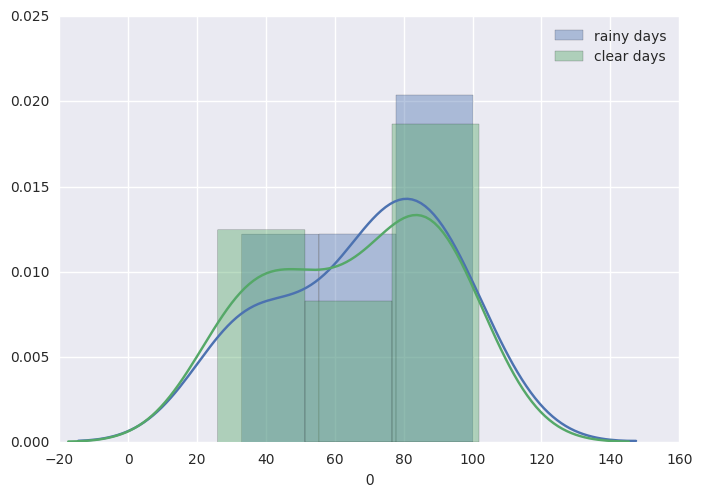

In [39]:
norain = april_complaints[april_complaints.rain==0]
rain = april_complaints[april_complaints.rain==1]
p = sns.distplot(rain[0], label='rainy days')
p = sns.distplot(norain[0], label='clear days')

plt.legend()

It looks like April's rainy days (in blue) had more days with higher numbers of complaints.  That's what we'd expect.  However, we're not sure if that's a significant difference.  A good way to test would be to use the scipy stats library to perform a t-test on the average number of complaints within each day type.

In [40]:
from scipy.stats import ttest_ind

In [41]:
# Test for significant difference
print "Difference in means:", rain[0].mean() - norain[0].mean()
ttest_ind(rain[0], norain[0])

Difference in means: 2.27272727273


Ttest_indResult(statistic=0.2454812674984114, pvalue=0.80787422556401667)

Surprise! The p-value is .8, which is far from significant.  That makes sense, the difference in the number of complaints is only 2, on average.  It might make sense to pull more weather data or use something like percipitation amount, rather than just any rain.